In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
# import pandas_profiling
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import SelectKBest,mutual_info_regression, chi2,mutual_info_classif,f_classif,f_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#show multiple output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df = pd.read_csv('results.csv')

In [5]:
df.head()
df.shape

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


(31984, 21)

Desciption columns:
- division: ranking in age
- official: finish time
- bib: race number determined by the qualifying race time
- genderdiv: ranking in gender
- ctz (citizen): nationality
- overall: overall ranking
- pace: overall average pace of the race

### Missing Values

In [6]:
(((df.isnull()|df.isna()).sum()/len(df))*100).round(2).sort_values(ascending = False)

ctz          96.11
state         8.05
40k           0.00
name          0.00
division      0.00
25k           0.00
gender        0.00
age           0.00
official      0.00
bib           0.00
genderdiv     0.00
35k           0.00
city          0.00
overall       0.00
pace          0.00
30k           0.00
5k            0.00
half          0.00
20k           0.00
country       0.00
10k           0.00
dtype: float64

Ctz is the highest missing column, and the next is "state". So I'll drop ctz column and change null in "State" to "Other"

In [6]:
df.drop(['ctz'],axis = 1, inplace = True)
# df=df[df['state'].notna()]
df['state'] = df['state'].replace(np.nan, 'Other')
(((df.isnull()|df.isna()).sum()/len(df))*100).round(2).sort_values(ascending = False)

40k          0.0
city         0.0
name         0.0
division     0.0
25k          0.0
gender       0.0
age          0.0
official     0.0
bib          0.0
genderdiv    0.0
35k          0.0
overall      0.0
pace         0.0
state        0.0
30k          0.0
5k           0.0
half         0.0
20k          0.0
country      0.0
10k          0.0
dtype: float64

In [8]:
df.shape

(31984, 20)

### Check data having 1 level

In [7]:
temp = []
for col in df:
    if df[col].nunique()>500:
        temp.append(col)
print('List columns have a lot of unique values: ',temp)

List columns have a lot of unique values:  ['10k', 'name', 'division', '25k', 'official', 'bib', 'genderdiv', '35k', 'overall', 'pace', '30k', '5k', 'half', '20k', 'city', '40k']


In [7]:
df.drop(['name','bib'],axis = 1, inplace = True)
df.head()
df.shape

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,M,47,85.25,8,71.40,8,3.27,Other,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,Other,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,M,41,80.60,1,67.42,1,3.08,Other,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,Other,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,M,40,81.23,2,67.83,2,3.10,Other,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


(31984, 18)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29408 entries, 9 to 31983
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        29408 non-null  object 
 1   division   29408 non-null  int64  
 2   25k        29408 non-null  object 
 3   gender     29408 non-null  object 
 4   age        29408 non-null  int64  
 5   official   29408 non-null  float64
 6   bib        29408 non-null  object 
 7   genderdiv  29408 non-null  int64  
 8   35k        29408 non-null  object 
 9   overall    29408 non-null  int64  
 10  pace       29408 non-null  float64
 11  state      29408 non-null  object 
 12  30k        29408 non-null  object 
 13  5k         29408 non-null  object 
 14  half       29408 non-null  object 
 15  20k        29408 non-null  object 
 16  country    29408 non-null  object 
 17  city       29408 non-null  object 
 18  40k        29408 non-null  object 
dtypes: float64(2), int64(4), object(13)
memory usa

There are some rows in elapsed time of the race columns not having actual value display by "-". So we also drop these rows like above

In [8]:
df.shape
df=df[df['5k']!= '-']
df.shape
df=df[df['10k']!= '-']
df.shape
df=df[df['20k']!= '-']
df.shape
df=df[df['half']!= '-']
df.shape
df=df[df['25k']!= '-']
df.shape
df=df[df['30k']!= '-']
df.shape
df=df[df['35k']!= '-']
df.shape
df=df[df['40k']!= '-']
df.shape

(31984, 18)

(31932, 18)

(31914, 18)

(31894, 18)

(31854, 18)

(31679, 18)

(31669, 18)

(31655, 18)

(31649, 18)

In [9]:
df[['5k','10k','20k','half','25k','35k','30k','40k']] = df[['5k','10k','20k','half','25k','35k','30k','40k']].astype('float')
# df[['division','genderdiv','overall']]=df[['division','genderdiv','overall']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   10k        31649 non-null  float64
 1   division   31649 non-null  int64  
 2   25k        31649 non-null  float64
 3   gender     31649 non-null  object 
 4   age        31649 non-null  int64  
 5   official   31649 non-null  float64
 6   genderdiv  31649 non-null  int64  
 7   35k        31649 non-null  float64
 8   overall    31649 non-null  int64  
 9   pace       31649 non-null  float64
 10  state      31649 non-null  object 
 11  30k        31649 non-null  float64
 12  5k         31649 non-null  float64
 13  half       31649 non-null  float64
 14  20k        31649 non-null  float64
 15  country    31649 non-null  object 
 16  city       31648 non-null  object 
 17  40k        31649 non-null  float64
dtypes: float64(10), int64(4), object(4)
memory usage: 4.6+ MB


### Handling Outliers

In [32]:
df.describe(percentiles = [.1,.25,.5,.75,.95,.99])

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
count,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000,29103.000000
mean,51.827082,134.107068,42.054256,242.813434,196.771704,9.269305,164.525433,25.779254,111.639899,105.728655,229.037616
std,8.704309,25.627832,11.348288,50.921669,40.869530,1.942165,32.965134,4.207013,20.333671,19.186131,48.164805
min,17.120000,48.550000,18.000000,84.820000,70.830000,3.250000,59.770000,8.020000,40.200000,38.020000,80.180000
10%,41.820000,105.400000,27.000000,185.134000,150.884000,7.070000,127.630000,20.930000,88.620000,83.980000,174.672000
25%,45.580000,115.920000,33.000000,205.980000,167.550000,7.870000,141.075000,22.730000,97.180000,92.070000,194.280000
50%,50.430000,129.230000,42.000000,232.570000,188.400000,8.880000,157.980000,25.150000,108.020000,102.350000,219.120000
75%,57.200000,148.430000,50.000000,273.310000,220.270000,10.430000,183.125000,28.500000,123.200000,116.650000,257.780000
95%,67.830000,184.268000,61.000000,341.627000,276.848000,13.030000,229.629000,33.250000,150.770000,142.648000,322.718000
99%,74.949600,206.719000,68.000000,381.699400,310.518000,14.570000,258.018600,36.669600,168.470000,159.399600,361.119200


In [9]:
df_num = df.select_dtypes(include = ['int64','float64'])
df_cate = df.select_dtypes(include = ['category','object'])
df_num.head()
df_cate.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


,gender,state,country,city
0,M,Other,JPN,Fukuoka
1,F,Other,KEN,Eldoret
2,M,Other,RSA,Paarl
3,F,Other,ETH,Shoa
4,M,Other,JPN,Nogata Fukuoka


In [37]:
df['state'].value_counts()

MA    7427
CA    2302
NY    1537
ON    1045
PA     997
TX     988
IL     911
OH     754
FL     745
VA     709
MI     689
NC     617
WA     595
CO     576
NJ     564
MN     554
MD     522
NH     521
CT     520
GA     441
UT     429
WI     429
QC     418
OR     405
AZ     316
IN     290
TN     255
MO     253
ME     249
RI     232
AB     206
BC     205
DC     203
SC     182
IA     152
KY     144
VT     141
KS     141
ID     123
NE     110
NS     108
AL     104
OK      92
NV      87
LA      77
NM      71
MT      65
DE      63
WV      56
NB      55
AK      49
AR      48
HI      48
MB      47
MS      44
SK      32
SD      32
ND      31
PE      23
WY      22
NL      17
PR      17
AE       7
YT       5
NT       3
GU       1
AP       1
AA       1
Name: state, dtype: int64

In [12]:
df['country'].value_counts()

USA    26939
CAN     2164
GBR      341
ITA      209
MEX      202
GER      180
JPN      172
AUS      123
IRL      116
FRA      113
ESP       87
BRA       86
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       49
CHN       42
COL       40
CHI       29
FIN       28
BEL       27
ISL       27
SIN       23
AUT       21
NOR       21
RSA       19
VEN       19
RUS       18
TPE       18
BER       17
UAE       17
NZL       17
CRC       16
POL       15
GUA       15
ARG       15
KEN       12
SLO        9
POR        9
GRE        8
ISR        7
PER        7
IND        6
ETH        6
SVK        4
PHI        4
CZE        4
TUR        4
LUX        4
ECU        3
PAN        3
UKR        3
HUN        3
DOM        3
MAS        3
EGY        2
ESA        2
QAT        2
BAH        2
ROU        2
THA        2
BLR        1
BOL        1
ZIM        1
BAR        1
TRI        1
URU        1
BRN        1
CRO        1
MAR        1
EST        1
CAY        1
TAN        1
LIE        1
VGB        1

In [41]:
df['city'].value_counts()

Boston        1018
New York       497
Chicago        312
Cambridge      303
Somerville     239
              ... 
Amqui            1
Belpre           1
Loxley           1
Philmont         1
Clarks           1
Name: city, Length: 4648, dtype: int64

In [10]:
def state_convert(value):
    if value in ('MA','CA','NY','ON','Boston','New York','USA','CAN'):
        return value
    else:
        return 'Other'

In [11]:
df['state_1']=df['state'].map(state_convert)
df['city_1']=df['city'].map(state_convert)
df['country_1']=df['country'].map(state_convert)
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,state_1,city_1,country_1
0,17.37,8,47.67,M,47,85.25,8,71.40,8,3.27,Other,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,Other,Other,Other
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,Other,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,Other,Other,Other
2,16.62,1,45.80,M,41,80.60,1,67.42,1,3.08,Other,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,Other,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,Other,Other,Other
4,17.12,2,46.37,M,40,81.23,2,67.83,2,3.10,Other,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,Other,Other,Other


c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state_1', ylabel='count'>

c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='country_1', ylabel='count'>

c:\users\my\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='city_1', ylabel='count'>

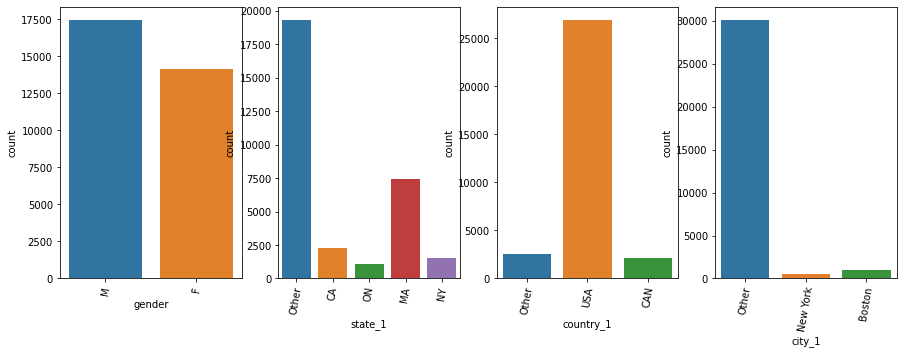

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))
df_cate = df.select_dtypes(include = ['category','object'])
df_ct_brief = df_cate[['gender','state_1','country_1','city_1']]
# df_ct_brief.head()
for variable, subplot in zip(df_ct_brief, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(80)

In [12]:
lb = LabelEncoder()
df1 = df.copy()
df1.drop(['state','city','division','official','genderdiv','overall','country'],axis = 1, inplace = True)
# df_ct_brief = df[['UniqueCarrier','Origin',	'Dest']]
for col in df_ct_brief:
    print(col)
#     df1[col+'_encoded'] = lb.fit_transform(df1[col]).astype(str)
    df1[col+'_encoded'] = lb.fit_transform(df1[col].astype(str))
df_encode = df1.drop(df_ct_brief,axis = 1)
df_encode.head()

NameError: name 'df_ct_brief' is not defined

In [18]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   10k                31649 non-null  float64
 1   25k                31649 non-null  float64
 2   age                31649 non-null  int64  
 3   35k                31649 non-null  float64
 4   pace               31649 non-null  float64
 5   30k                31649 non-null  float64
 6   5k                 31649 non-null  float64
 7   half               31649 non-null  float64
 8   20k                31649 non-null  float64
 9   40k                31649 non-null  float64
 10  gender_encoded     31649 non-null  int32  
 11  state_1_encoded    31649 non-null  int32  
 12  country_1_encoded  31649 non-null  int32  
 13  city_1_encoded     31649 non-null  int32  
dtypes: float64(9), int32(4), int64(1)
memory usage: 4.1 MB


In [13]:
def outliers_treatment(column):
    q1 = df_encode[column].quantile(0.25)
    q3 = df_encode[column].quantile(0.75)
    iqr= q3 -q1
#     iqr1 = stats.iqr(df[col], interpolation = 'midpoint')
    lower = q1 - 1.5*iqr
    upper = q3 +1.5*iqr
    return lower,upper

List column having outliers:  ['10k', '20k', '25k', '30k', '35k', '40k', '5k', 'age', 'city_1_encoded', 'country_encoded', 'half', 'pace']


<Figure size 576x288 with 0 Axes>

(array([2.8000e+01, 2.7600e+02, 7.1030e+03, 1.2632e+04, 6.5050e+03,
        2.2150e+03, 3.1700e+02, 2.2000e+01, 4.0000e+00, 1.0000e+00]),
 array([ 17.12 ,  26.646,  36.172,  45.698,  55.224,  64.75 ,  74.276,
         83.802,  93.328, 102.854, 112.38 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '10k')

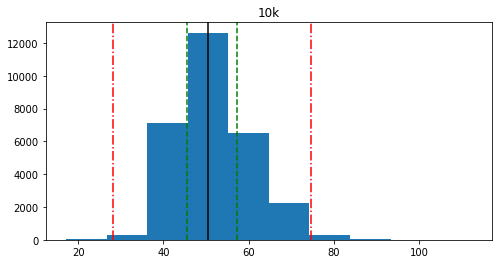

<Figure size 576x288 with 0 Axes>

(array([2.600e+01, 5.380e+02, 7.877e+03, 1.172e+04, 5.689e+03, 2.470e+03,
        7.000e+02, 7.500e+01, 6.000e+00, 2.000e+00]),
 array([ 38.02 ,  56.653,  75.286,  93.919, 112.552, 131.185, 149.818,
        168.451, 187.084, 205.717, 224.35 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '20k')

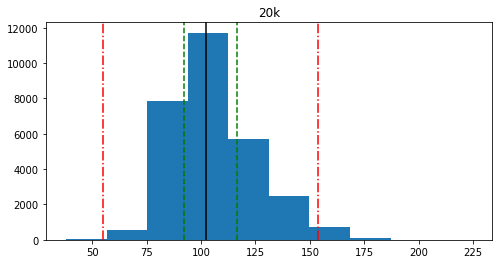

<Figure size 576x288 with 0 Axes>

(array([2.6000e+01, 8.0100e+02, 8.9250e+03, 1.1048e+04, 5.1970e+03,
        2.2470e+03, 7.6400e+02, 8.6000e+01, 6.0000e+00, 3.0000e+00]),
 array([ 48.55 ,  72.597,  96.644, 120.691, 144.738, 168.785, 192.832,
        216.879, 240.926, 264.973, 289.02 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '25k')

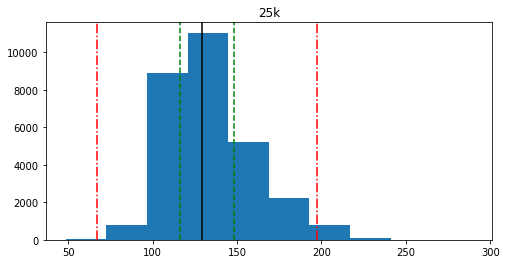

<Figure size 576x288 with 0 Axes>

(array([2.8000e+01, 1.6720e+03, 1.1584e+04, 9.2100e+03, 4.2870e+03,
        1.8210e+03, 4.6200e+02, 3.5000e+01, 2.0000e+00, 2.0000e+00]),
 array([ 59.77 ,  91.431, 123.092, 154.753, 186.414, 218.075, 249.736,
        281.397, 313.058, 344.719, 376.38 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '30k')

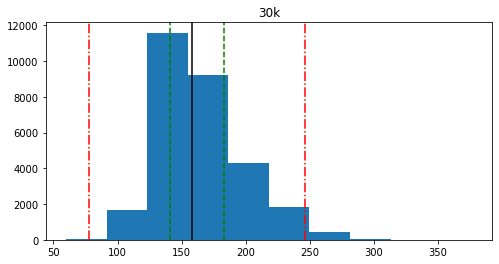

<Figure size 576x288 with 0 Axes>

(array([2.7000e+01, 1.8840e+03, 1.1384e+04, 8.8540e+03, 4.3920e+03,
        1.9380e+03, 5.6800e+02, 5.2000e+01, 2.0000e+00, 2.0000e+00]),
 array([ 70.83, 108.68, 146.53, 184.38, 222.23, 260.08, 297.93, 335.78,
        373.63, 411.48, 449.33]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '35k')

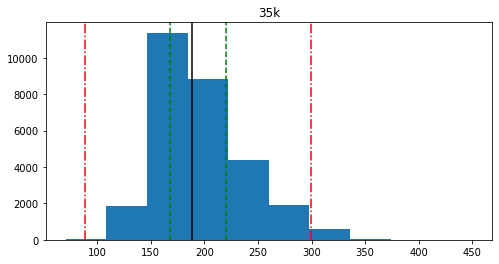

<Figure size 576x288 with 0 Axes>

(array([2.6000e+01, 1.4110e+03, 1.0169e+04, 9.3260e+03, 4.8940e+03,
        2.3970e+03, 7.8700e+02, 8.8000e+01, 3.0000e+00, 2.0000e+00]),
 array([ 80.18 , 122.997, 165.814, 208.631, 251.448, 294.265, 337.082,
        379.899, 422.716, 465.533, 508.35 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '40k')

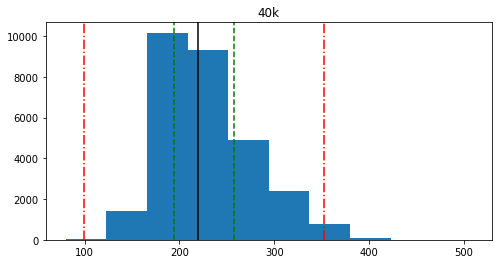

<Figure size 576x288 with 0 Axes>

(array([5.0000e+01, 1.0253e+04, 1.5989e+04, 2.7550e+03, 5.3000e+01,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 8.02 , 15.913, 23.806, 31.699, 39.592, 47.485, 55.378, 63.271,
        71.164, 79.057, 86.95 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5k')

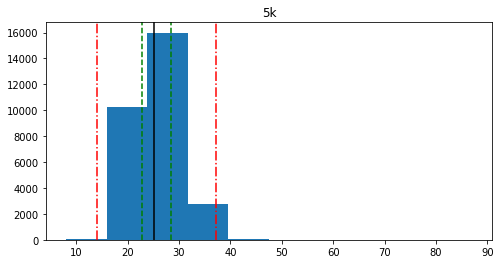

<Figure size 576x288 with 0 Axes>

(array([1437., 4102., 4351., 5947., 5432., 4144., 2558.,  889.,  199.,
          44.]),
 array([18. , 24.3, 30.6, 36.9, 43.2, 49.5, 55.8, 62.1, 68.4, 74.7, 81. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'age')

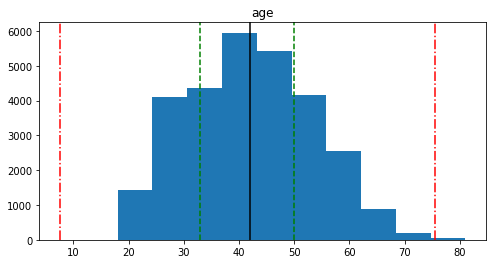

<Figure size 576x288 with 0 Axes>

(array([ 1018.,     0.,     0.,     0.,     0.,   497.,     0.,     0.,
            0., 27588.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'city_1_encoded')

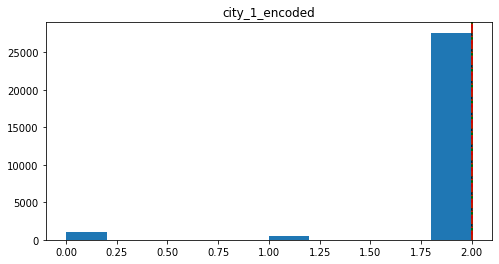

<Figure size 576x288 with 0 Axes>

(array([ 2164.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26939.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'country_encoded')

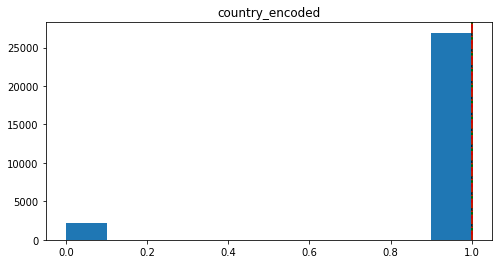

<Figure size 576x288 with 0 Axes>

(array([2.7000e+01, 5.4600e+02, 7.8790e+03, 1.1691e+04, 5.6840e+03,
        2.4730e+03, 7.1000e+02, 8.4000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 40.2  ,  59.847,  79.494,  99.141, 118.788, 138.435, 158.082,
        177.729, 197.376, 217.023, 236.67 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'half')

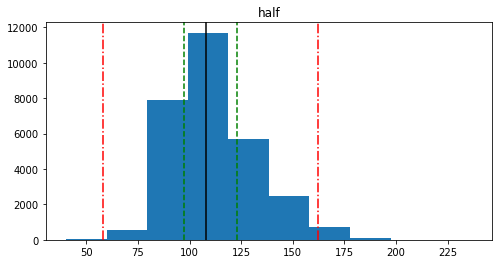

<Figure size 576x288 with 0 Axes>

(array([2.6000e+01, 1.4330e+03, 1.0095e+04, 9.3060e+03, 4.9640e+03,
        2.4450e+03, 7.5500e+02, 7.4000e+01, 3.0000e+00, 2.0000e+00]),
 array([ 3.25 ,  4.982,  6.714,  8.446, 10.178, 11.91 , 13.642, 15.374,
        17.106, 18.838, 20.57 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'pace')

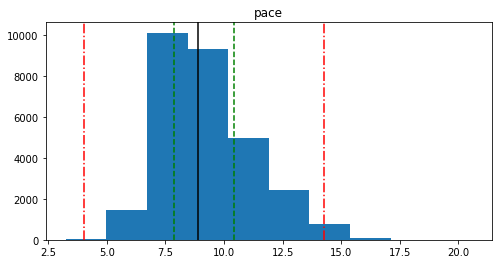

In [61]:
#show list column having outliers
temp = []
# df_temp = df_encode[df_encode.columns.difference(['Date_Part','Date','UniqueCarrier_encoded',	'Origin_encoded',	'Dest_encoded'])]
for col in df_encode:
    # print(col)
    lower, upper = outliers_treatment(col)
    x=np.array(df_encode[col])
    for j in x:
        if j < lower or j > upper:
            temp.append(col)
            break

print('List column having outliers: ',temp)
for col in temp:
    plt.figure(figsize=(8,4))
    plt.hist(df_encode[col])
    lower, upper = outliers_treatment(col)
    # np.percentile(df['MonthlyIncome'] , [25])
    plt.title(col)
    plt.axvline(lower, linestyle='dashdot', color='red')
    plt.axvline(np.percentile(df_encode[col] , [25]), linestyle='--', color='green')
    plt.axvline(np.percentile(df_encode[col] , [50]), linestyle='-',  color='black')
    plt.axvline(np.percentile(df_encode[col] , [75]), linestyle='--', color='green')
    plt.axvline(upper, linestyle='dashdot', color='red')
    plt.show()

In [21]:
for col in df_encode:
    print(col)
    lower, upper = outliers_treatment(col)
    out = ((df_encode[col] < lower) | (df_encode[col] >upper )).sum()
    per_out = round((out/len(df_encode)),2)*100
    print(per_out)

10k
1.0
25k
2.0
age
0.0
35k
2.0
pace
2.0
30k
2.0
5k
1.0
half
2.0
20k
2.0
40k
2.0
gender_encoded
0.0
state_1_encoded
0.0
country_1_encoded
15.0
city_1_encoded
5.0


In [14]:
df.shape
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(31649, 21)

(29382, 21)

In [23]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,state_1,city_1,country_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,Other,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,Other,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,Other,Other,Other
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,Other,99.33,16.22,69.47,65.83,KEN,Nandi,132.95,Other,Other,Other
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,Other,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80,Other,Other,Other
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,CA,Other,USA


In [15]:
df.drop(['city','state','country'],axis = 1, inplace = True)

### Check correlation

<AxesSubplot:>

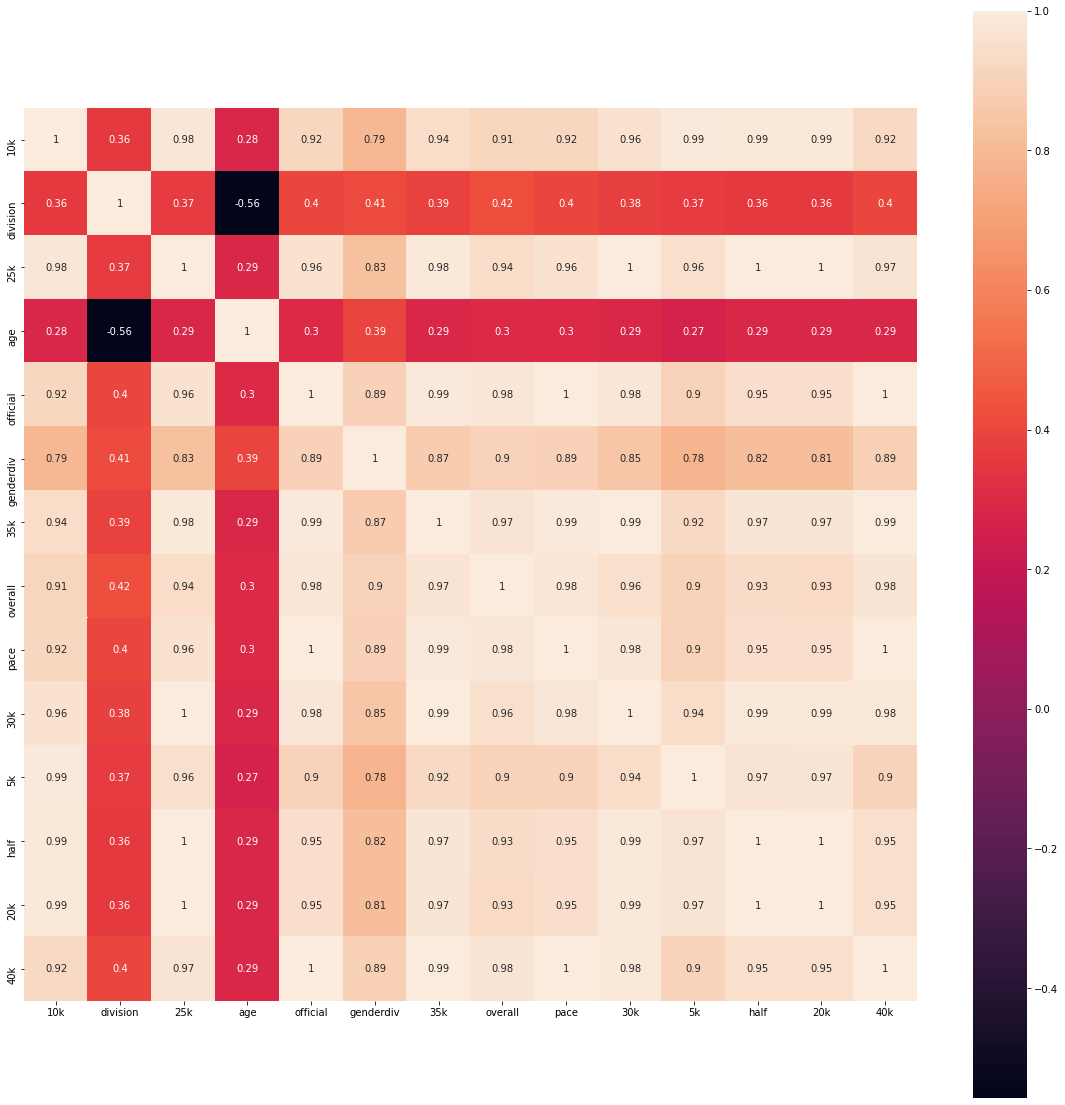

In [25]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

In [26]:
df.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA


In [72]:
# df.drop(['bib'],axis =1, inplace = True)

### Apply PCA

In [20]:
df2 = df.copy()
df2.drop(['division','genderdiv'],axis =1, inplace = True)
df2 = pd.get_dummies(df2)
df2.head()

,10k,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,gender_F,gender_M,state_1_CA,state_1_MA,state_1_NY,state_1_ON,state_1_Other,city_1_Boston,city_1_New York,city_1_Other,country_1_CAN,country_1_Other,country_1_USA
1,32.58,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,1,0,0,0,0,0,1,0,0,1,0,1,0
3,32.57,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,1,0,0,0,0,0,1,0,0,1,0,1,0
5,32.58,82.45,29,140.68,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,1,0,0,0,0,0,1,0,0,1,0,1,0
7,30.48,76.95,29,129.83,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,0,1,0,0,0,0,1,0,0,1,0,1,0
9,30.48,77.68,31,137.83,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,0,1,1,0,0,0,0,0,0,1,0,0,1


In [28]:
df2.shape

(29382, 25)

In [29]:
pca = PCA(n_components=df2.shape[1])
df_pca = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_ratio_.cumsum()

array([0.99999276, 0.99999736, 0.99999887, 0.99999983, 0.99999992,
       0.99999995, 0.99999996, 0.99999998, 0.99999998, 0.99999999,
       0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

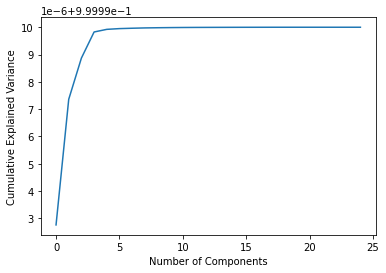

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [36]:
compo =  np.where(pca.explained_variance_ratio_.cumsum() > 0.99)
# compo1 = np.squeeze(compo)
# compo[0] + 1
compo
# compo1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24], dtype=int32),)

In [21]:
x = df2[df2.columns.difference(['5k','10k','20k','half','25k','35k','30k','40k','official'])]
y = df2[['5k','10k','20k','half','25k','35k','30k','40k','official']]

In [38]:
# x
# y

In [42]:
from sklearn.cluster import KMeans
ks = range(2,10)
inertias = []
for k in ks:
    kmeans = KMeans(n_clusters = k,random_state=0)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Text(0.5, 0, 'number of clusters, k')

Text(0, 0.5, 'inertia')

Text(0.5, 1.0, 'The Elbow Method using Distortion')

([<matplotlib.axis.XTick at 0x181c5530>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

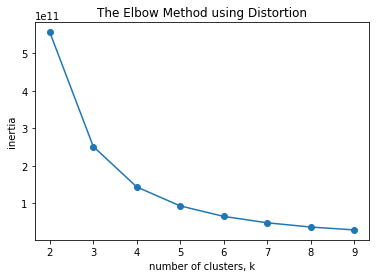

In [43]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('The Elbow Method using Distortion')
plt.xticks(ks)
plt.show()

Choose k = 3,4,5,6

### Silhouette Score

In [44]:
from sklearn import metrics
ks = range(2,10)
silhouetteScore=[]
for k in ks:
#     print('n_clusters: ',k)
    kmeans = KMeans(n_clusters = k,random_state=0)
    kmeans.fit(x)
    label = kmeans.predict(x)
    silhouetteScore.append(metrics.silhouette_score(x, label, metric='euclidean'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [45]:
silhouetteScore

[0.6232845497612598,
 0.5851202025112578,
 0.5654733489477654,
 0.5534122930862029,
 0.5459409716689526,
 0.5415023051523982,
 0.5408523448322422,
 0.5391938674409233]

Text(0.5, 0, 'number of clusters, k')

Text(0, 0.5, 'silhouette score')

([<matplotlib.axis.XTick at 0x183e0ed0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

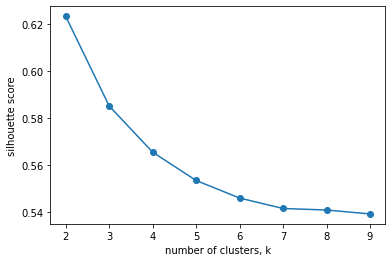

In [46]:
# Plot ks vs inertias
plt.plot(ks, silhouetteScore, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.xticks(ks)
plt.show()

==> Choose k = 2,3

(-0.1, 1.0)

(0.0, 29412.0)

For n_clusters = 2 The average silhouette_score is : 0.6232845497612598


Text(-0.05, 7420.0, '0')

Text(-0.05, 22121.0, '1')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 2')

(-0.1, 1.0)

(0.0, 29422.0)

For n_clusters = 3 The average silhouette_score is : 0.5851305446890563


Text(-0.05, 4966.5, '0')

Text(-0.05, 14710.5, '1')

Text(-0.05, 24455.0, '2')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 3')

(-0.1, 1.0)

(0.0, 29432.0)

For n_clusters = 4 The average silhouette_score is : 0.5654694851334358


Text(-0.05, 3760.0, '0')

Text(-0.05, 11244.0, '1')

Text(-0.05, 18712.0, '2')

Text(-0.05, 25939.0, '3')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 4')

(-0.1, 1.0)

(0.0, 29442.0)

For n_clusters = 5 The average silhouette_score is : 0.5534101075138764


Text(-0.05, 3009.0, '0')

Text(-0.05, 9041.5, '1')

Text(-0.05, 14752.5, '2')

Text(-0.05, 20453.0, '3')

Text(-0.05, 26454.0, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 5')

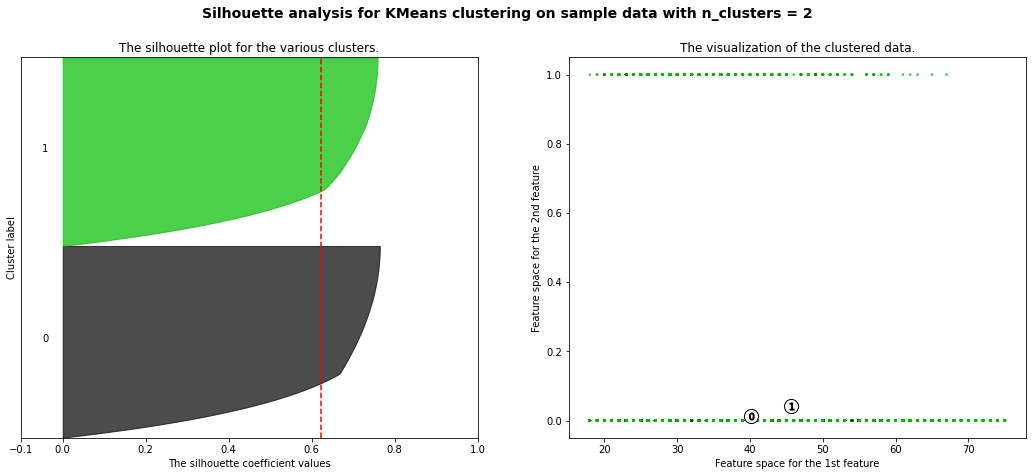

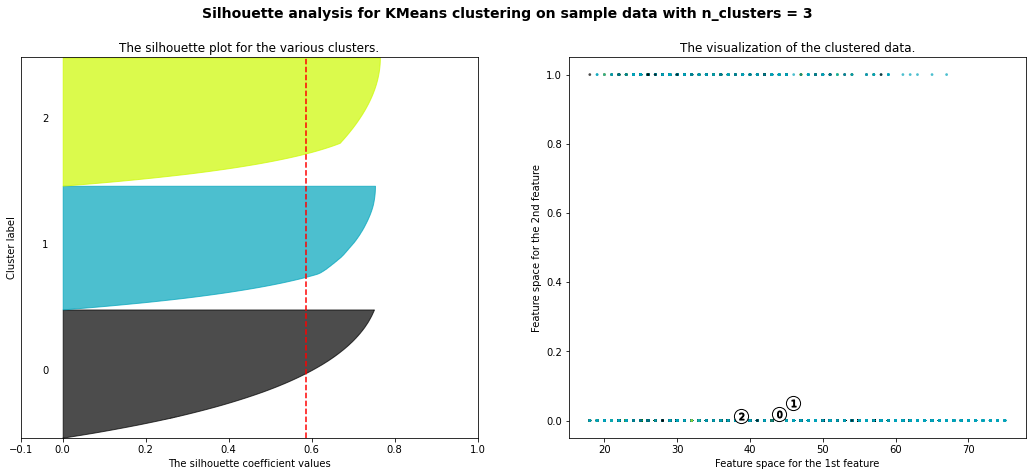

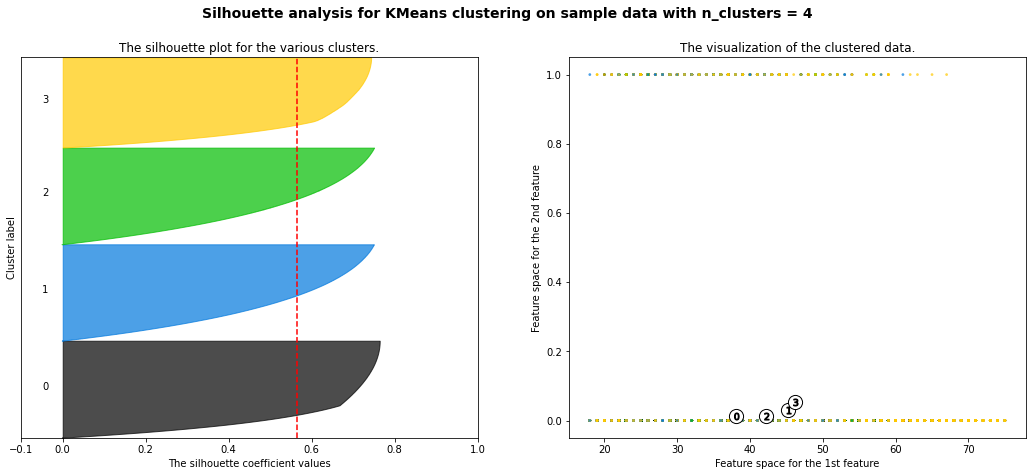

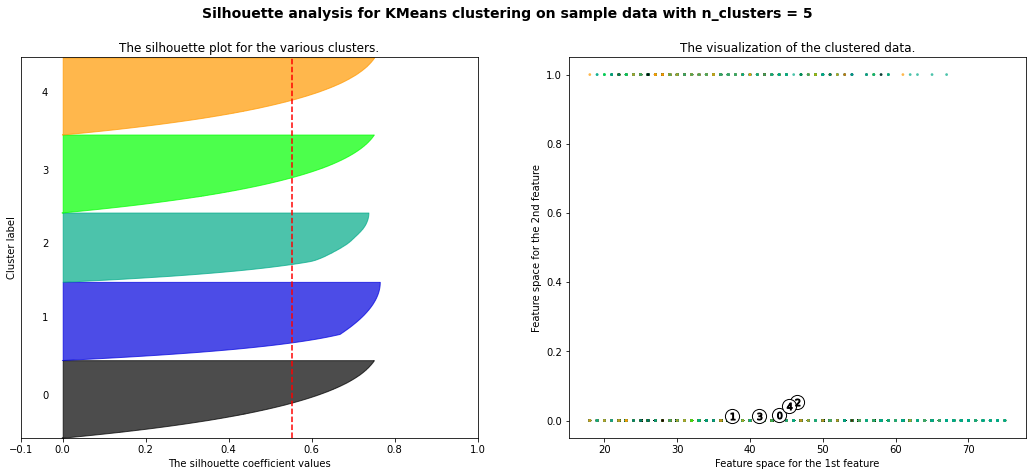

In [54]:
ks = range(2,6)
import matplotlib.cm as cm
for n_clusters in ks:
#     Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x.iloc[:, 0], x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

(-0.1, 1.0)

(0.0, 29412.0)

For n_clusters = 2 The average silhouette_score is : 0.6232845497612598


Text(-0.05, 7420.0, '0')

Text(-0.05, 22121.0, '1')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 2')

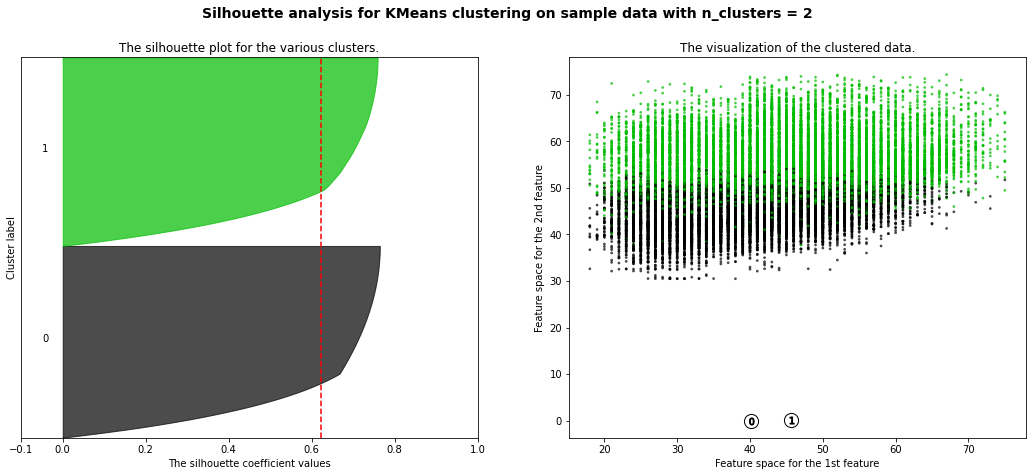

In [60]:
ks = [2]
for n_clusters in ks:
#     Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(x)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = metrics.silhouette_score(x, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = metrics.silhouette_samples(x, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x.iloc[:, 0], y.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
     # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax1.scatter(x.iloc[:, 0], y.iloc[:, 0], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax1.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax1.set_title("The visualization of the clustered data.")
    ax1.set_xlabel("Feature space for the 1st feature")
    ax1.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


plt.show()

In [63]:
# y.iloc[:, 1]
x

,age,city_1_Boston,city_1_New York,city_1_Other,country_1_CAN,country_1_Other,country_1_USA,gender_F,gender_M,overall,pace,state_1_CA,state_1_MA,state_1_NY,state_1_ON,state_1_Other
1,33,0,0,1,0,1,0,1,0,21,5.30,0,0,0,0,1
3,24,0,0,1,0,1,0,1,0,27,5.37,0,0,0,0,1
5,29,0,0,1,0,1,0,1,0,28,5.37,0,0,0,0,1
7,29,0,0,1,0,1,0,0,1,5,4.97,0,0,0,0,1
9,31,0,0,1,0,0,1,0,1,20,5.27,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31977,37,1,0,0,0,0,1,0,1,27490,11.57,0,1,0,0,0
31979,32,0,0,1,0,0,1,0,1,9849,8.08,1,0,0,0,0
31980,34,0,0,1,0,0,1,0,1,27456,11.55,0,1,0,0,0
31981,21,0,0,1,0,0,1,1,0,25092,10.77,0,0,0,0,1


### Gender

In [34]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(x)
label = kmeans.predict(x)
label

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

array([1, 1, 1, ..., 0, 0, 2])

In [35]:
df3 = df.copy()
df3['Label'] = label
df3.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1,Label
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other,1
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other,1
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other,1
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other,1
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA,1


In [37]:
 df3.groupby(['gender', 'Label']).size()

gender  Label
F       0        4612
        1        2390
        2        5544
M       0        4922
        1        7550
        2        4364
dtype: int64

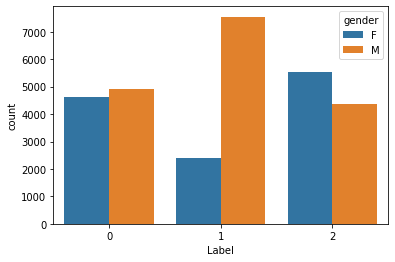

In [36]:
# df3.groupby(['gender', 'Label']).size()
# import seaborn as sns
sns.countplot(data=df3,x='Label',hue='gender')

1. Total data point in each clusters are equal, approximately 10k
2. Cluster 0 and 2 have the same ratio between Male and Female, exclude cluster 1 with the highest ratio of Male
3. The rate of Male is higher then Female'one in cluster 0 and 1 

### AGE

Split into 4 groups:
1. Age [18-25]
2. Age [26-40]
3. Age [40-70]
4. Age 70+

In [38]:
def Age(num):
    if( (num >= 18) and (num <=25)):
        return 0
    elif( (num >= 26) and (num <=40)):
        return 1
    elif( (num >= 41) and (num <=70)):
        return 2
    elif(num > 70):
        return 3
    else:
        return -1

In [41]:
df4 = df3.copy()
df4['Age_1']=df4['age'].map(Age)
df4.head()

,10k,division,25k,gender,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,state_1,city_1,country_1,Label,Age_1
1,32.58,1,82.43,F,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,Other,Other,Other,1,1
3,32.57,3,82.43,F,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,Other,Other,Other,1,0
5,32.58,4,82.45,F,29,140.68,4,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95,Other,Other,Other,1,1
7,30.48,5,76.95,M,29,129.83,5,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80,Other,Other,Other,1,1
9,30.48,20,77.68,M,31,137.83,20,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83,CA,Other,USA,1,1


In [43]:
 df4.groupby(['Age_1', 'Label']).size()

Age_1  Label
0      0         438
       1         762
       2         485
1      0        2607
       1        4832
       2        3041
2      0        6382
       1        4345
       2        6368
3      0         107
       1           1
       2          14
dtype: int64

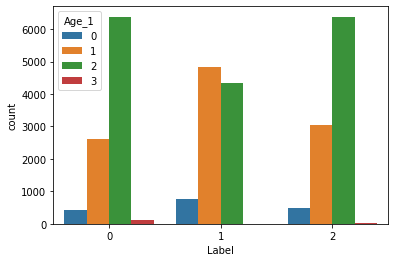

In [44]:
sns.countplot(data=df4,x='Label',hue='Age_1')

1. Age group 2 [40-70] is the highest group in cluster 0 and 2. Last and next position is group 1 [18-25]  and 3 [70+] respectively 
2. Most age is group 2,1,0,3
3. The number of data point in each cluster are equal

### Finish Time

In [48]:
 df3.groupby('Label')['official'].mean()

Label
0    284.852835
1    191.276337
2    229.191220
Name: official, dtype: float64

In [49]:
df3['official'].mean()

234.42585018038008

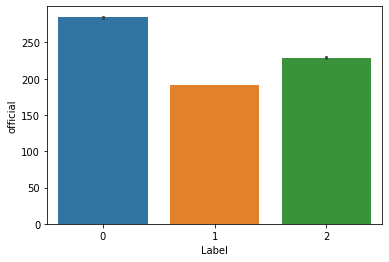

In [51]:
sns.barplot(x='Label',y='official',data=df3)